<a href="https://colab.research.google.com/github/FlyOrBoom/ulab-cosmo/blob/main/Density_field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np

%matplotlib inline

In [2]:
!pip install cupy-cuda12x

In [3]:
# import cupy as cp

In [45]:
use2D = True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
densityfile = h5py.File(f'/content/drive/MyDrive/ulab_data/density/snap_099.2.hdf5', 'r')

In [ ]:
# Function to recursively print the contents of the HDF5 file
def print_hdf5_item(name, obj):
    if isinstance(obj, h5py.Group):
        print(f"Group: {name}")
        for key, item in obj.items():
            print_hdf5_item(f"{name}/{key}", item)
    elif isinstance(obj, h5py.Dataset):
        print(f"Dataset: {name} - Shape: {obj.shape} - Dtype: {obj.dtype}")

# Start printing from the root of the HDF5 file
print_hdf5_item('/', densityfile)

Group: /
Group: //Config
Group: //Header
Group: //Parameters
Group: //PartType1
Dataset: //PartType1/Coordinates - Shape: (78137054, 3) - Dtype: float64
Dataset: //PartType1/ParticleIDs - Shape: (78137054,) - Dtype: uint64
Dataset: //PartType1/Potential - Shape: (78137054,) - Dtype: float32
Dataset: //PartType1/SubfindDMDensity - Shape: (78137054,) - Dtype: float32
Dataset: //PartType1/SubfindDensity - Shape: (78137054,) - Dtype: float32
Dataset: //PartType1/SubfindHsml - Shape: (78137054,) - Dtype: float32
Dataset: //PartType1/SubfindVelDisp - Shape: (78137054,) - Dtype: float32
Dataset: //PartType1/Velocities - Shape: (78137054, 3) - Dtype: float32


In [6]:
dmPos = np.array(densityfile["//PartType1/Coordinates"])
dmDensity = np.array(densityfile["//PartType1/SubfindDMDensity"])

dmPos, dmDensity

(array([[ 7404.66555525, 24597.50317281, 21005.5674643 ],
        [ 7551.99658461, 24254.00295983, 21037.80167317],
        [ 7307.43490543, 24435.26096975, 21187.47076662],
        ...,
        [ 6910.6093426 , 24248.07775716, 21534.66783726],
        [ 7422.06998443, 24135.23757628, 21043.71693596],
        [ 7213.16299174, 25211.79132927, 21896.46070647]]),
 array([3.4001467e-05, 2.2776707e-05, 1.3470004e-04, ..., 1.3391626e-06,
        8.3339091e-06, 3.5491173e-06], dtype=float32))

In [32]:
dmDensity.size

78137054

In [7]:
dmPosMin = np.min(dmPos, axis=0)
dmPosMax = np.max(dmPos, axis=0)

dmPosMin, dmPosMax

(array([ 6457.35033663, 23641.86300315, 20428.79086083]),
 array([ 8147.28965769, 25420.19112169, 22186.46161964]))

In [40]:
scale = 0.1
dims = ((dmPosMax - dmPosMin)*scale).astype(int)

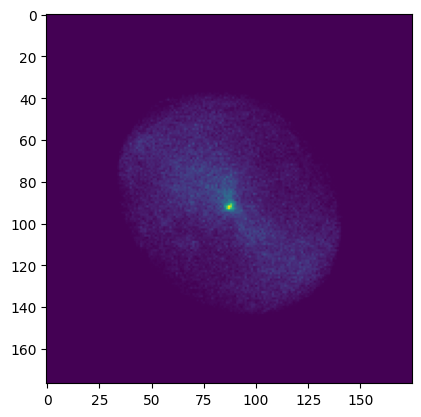

In [49]:
dmRaster = np.zeros(dims, dtype=float )

N = 1e5
for (i, particlePos) in enumerate(dmPos):

  [x, y, z] = ((particlePos - dmPosMin)*scale).astype(int)
  if use2D: x = 0

  dmRaster[x,y,z] += dmDensity[i]
  dmRaster[x,y,z] += 1
  if i > N: break

if use2D:
  plt.imshow(dmRaster[0])
else:
  print("figure out volumetric plots")